In [2]:
import imutils
import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt 



In [3]:
#have list of images path
from glob import glob 
data_dir = 'test'
img_fns = glob(data_dir + '/*')
#print(img_fns)

# Get fonction with easy_ocr best parameters

(-0.5, 1023.5, 767.5, -0.5)

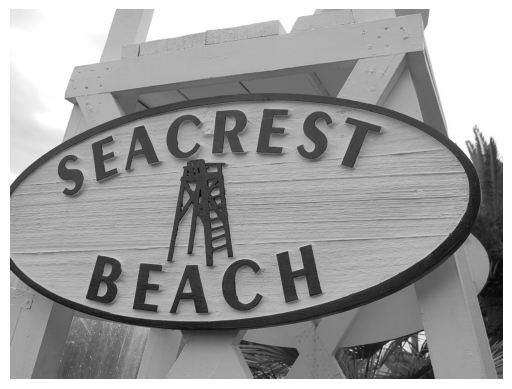

In [4]:
img = cv2.imread(data_dir + '/image002.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.axis('off')

In [5]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
#edged = cv2.Canny(bfilter, 30, 200) #Edge detection
#ok = cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)
#plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
#plt.imshow(ok)

In [6]:
reader = easyocr.Reader(['en'], gpu = False)#create reader with english langage
result_1 = reader.readtext(bfilter, decoder='beamsearch') #img de base avec bfilter et beamsearch
result_2 = reader.readtext(bfilter, decoder='wordbeamsearch')# img de base avec bfilter et wordbeamsearch
result_3 = reader.readtext(img) # img de base
print(result_1)
print('----------------------------------------------------')
print('----------------------------------------------------')
print(result_2)
print('----------------------------------------------------')
print('----------------------------------------------------')
print(result_3)

Using CPU. Note: This module is much faster with a GPU.


[([[346, 330], [466, 330], [466, 486], [346, 486]], '4', 0.474296306225952), ([[153, 477], [662, 477], [662, 664], [153, 664]], 'BEACH', 0.4897234167997189), ([[85.39527057362662, 223.16216458901297], [779.9495086618938, 169.4412574262267], [777.6047294263734, 344.837835410987], [83.05049133810624, 398.5587425737733]], 'SEACREST', 0.9789898332343427)]
----------------------------------------------------
----------------------------------------------------
[([[346, 330], [466, 330], [466, 486], [346, 486]], '4', 0.474296306225952), ([[153, 477], [662, 477], [662, 664], [153, 664]], 'BEACH', 0.4897234167997189), ([[85.39527057362662, 223.16216458901297], [779.9495086618938, 169.4412574262267], [777.6047294263734, 344.837835410987], [83.05049133810624, 398.5587425737733]], 'SEACREST', 0.9789898332343427)]
----------------------------------------------------
----------------------------------------------------
[([[69, 154], [799, 154], [799, 412], [69, 412]], 'SiAcREST', 0.1171727379524335

# Determine background color

In [19]:
from colorthief import ColorThief


def is_background_darkened(img_path):
    ct = ColorThief(img_path)
    dominent_color = ct.get_color(quality=1)
    #print(dominent_color)
    #plt.imshow([dominent_color])
    #plt.show()

    # Convertir la couleur en niveaux de gris
    gray = np.dot(dominent_color[0:3], [0.299, 0.587, 0.114])

    # Déterminer si la couleur du background est claire ou foncée
    if gray > 128:
        return False
    else:
        return True

#path = 'test/image001.jpg'
#result = is_background_darkened(path)
#print(result)

# IF BACKGROUND NOT DARKENED

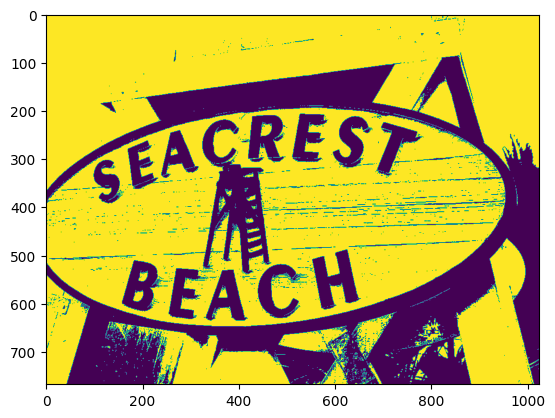

In [31]:
# Lire l'image
img = cv2.imread('test/image002.jpg')

# Convertir l'image en niveaux de gris
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Appliquer le seuillage
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Inverser les couleurs
inverted = cv2.bitwise_not(thresh)

# Afficher l'image résultante
plt.imshow(inverted)

In [32]:
reader = easyocr.Reader(['en'], gpu = False)#create reader with english langage
result_1 = reader.readtext(inverted, decoder='beamsearch') #img de base avec bfilter et beamsearch
result_2 = reader.readtext(bfilter, decoder='wordbeamsearch')# img de base avec bfilter et wordbeamsearch

Using CPU. Note: This module is much faster with a GPU.


In [33]:
print(result_1)
print(result_2)

[([[153, 485], [663, 485], [663, 656], [153, 656]], 'BEACH', 0.9662760083506136), ([[82.1877241839707, 223.1891589613832], [764.8215060290512, 162.06401422000542], [764.8122758160293, 338.8108410386168], [82.17849397094881, 400.9359857799946]], 'SEACREST', 0.8574665000589388)]
[([[346, 330], [466, 330], [466, 486], [346, 486]], '4', 0.474296306225952), ([[153, 477], [662, 477], [662, 664], [153, 664]], 'BEACH', 0.4897234167997189), ([[85.39527057362662, 223.16216458901297], [779.9495086618938, 169.4412574262267], [777.6047294263734, 344.837835410987], [83.05049133810624, 398.5587425737733]], 'SEACREST', 0.9789898332343427)]


# IF BACKGROUND DARKENED

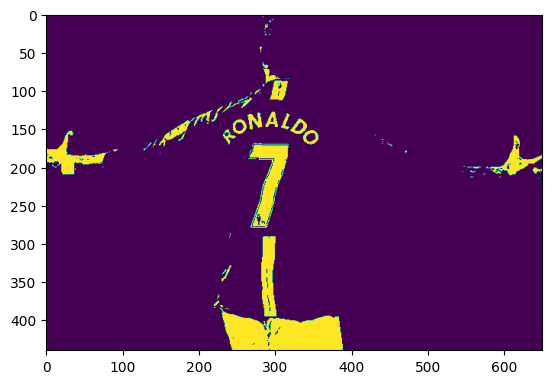

In [37]:
# Charger l'image
img = cv2.imread('test/image001.jpg')

# Convertir l'image en niveaux de gris
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Appliquer le seuillage inversé
_, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

# Inverser les couleurs
invertedd = cv2.bitwise_not(thresh)

# Afficher l'image originale et l'image inversée
#cv2.imshow('Original Image', img)
plt.imshow(invertedd)


In [38]:
reader = easyocr.Reader(['en'], gpu = False)#create reader with english langage
result_1 = reader.readtext(invertedd, decoder='beamsearch') #img de base avec bfilter et beamsearch
result_2 = reader.readtext(invertedd, decoder='wordbeamsearch')# img de base avec bfilter et wordbeamsearch

print(result_1)
print('-----------------------------------------------------------------------')
print(result_2)

Using CPU. Note: This module is much faster with a GPU.


[([[224, 119], [365, 119], [365, 179], [224, 179]], '<ONALDO', 0.11039348333943613)]
-----------------------------------------------------------------------
[([[224, 119], [365, 119], [365, 179], [224, 179]], '<ONALDO', 0.11039348333943613)]
